Note:
This is an unfinished notebook where I'm using only a partial amount of data before using the entire data set. 

The data used to test here is February 2021


<!--![](https://media.giphy.com/media/l0HluULNylbTu44Ao/giphy.gif)-->
## Introduction

In this project, we carry out exploratory analysis of the Divvy dataset by setting out research questions, and then exploring relationship between stations, user behaviors, user types, and bike types to answer those questions.

*The project was completed as a part of Google's Data Analytics Professional Certificate online course on Coursera.*

## Setup

In [31]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

## The Data

This dataset contains biketrip data in Chicago from year 2020-2021. The data is provided by [Divvy bikes](https://divvybikes.com) according to the [Divvy Data License Agreement](https://ride.divvybikes.com/data-license-agreement).

Each trip is anonymized and includes:
- Trip start day and time
- Trip end day and time
- Trip start station
- Trip end station
- Rider type (Member, Single Ride, and Day Pass)
- Rideable type (Casual, Docked, Electric)

The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).

The dataset is wrangled by [Chris](https://www.linkedin.com/in/arthur0418/). To know more about data wrangling documentation, visit this [link](https://github.com/ca-ros/DataSciencePortfolio/blob/master/Bike-trips-in-Chicago/docs/data_wrangling.md).

> To know more about Divvy and the dataset, visit this [link](https://ride.divvybikes.com/system-data).

## Exploratory data analysis
### Research questions
- How do annual members and casual riders use Divvy bikes differently?
- Why would casual riders buy Divvy bikes annual membership?
- How can Divvy bikes use digital media to influence casual riders to become members?

## Overview of data

In [32]:
def overview():
    data = pd.read_csv(
        "202102.csv",
        dtype = {
            'start_station_id': pd.Int64Dtype(),
            'end_station_id' : pd.Int64Dtype()})
    data.round()
    print("The first 5 rows of data are:\n", data.head(5))
    print("\nDataset has {} rows and {} columns\n".format(data.shape[0], data.shape[1]))
    print("\nDatatype:\n", data.dtypes)
    print("\nThe number of unique values in each column are:\n", data.nunique())
    print("\nThe number of null values for each column are:\n", data.isnull().sum())
    print("\nData summary: \n", data.describe())
    return data

# Lastly, assigning a variable to overview()
data = overview()

## Note: Uploading this file takes time, took me 5 mins to finish running this block

The first 5 rows of data are:
             ride_id  rideable_type  bike_id           start_time  \
0  19A112436EC92A7E   classic_bike      NaN  2021-02-01 00:55:44   
1  05A7BDE8A0D909FC  electric_bike      NaN  2021-02-01 01:07:04   
2  CAC54BCCD36F6B15  electric_bike      NaN  2021-02-01 01:15:19   
3  B12AD1843BE99A2C   classic_bike      NaN  2021-02-01 01:56:22   
4  A62978A16B1FFE79   classic_bike      NaN  2021-02-01 01:59:41   

              end_time  trip_duration  start_station_id  \
0  2021-02-01 10:44:58          35354               322   
1  2021-02-01 01:47:45           2441               498   
2  2021-02-01 01:22:48            449               192   
3  2021-02-01 01:59:23            181               192   
4  2021-02-01 02:21:23           1302               638   

             start_station_name  end_station_id              end_station_name  \
0         Kimbark Ave & 53rd St            <NA>                           NaN   
1  California Ave & Fletcher St            

<!-- ### What do we see?
- The dataset has 5,509,830 rows and 10 columns
- We notice null values on station_name columns (12.68 % of the data), that will be omitted in analysis
- We need to convert datatype of columns start_time and end_time into datetime

#### Change start_time & end_time into datetime

- If we look into the data type of start_time and end_time, we will notice that the data type of these variables is object. Since we will need to perform datetime analysis on these variables, we will need to convert them to a datetime type.

In [33]:
# Converting objects to datetime
data[['start_time', 'end_time']] = data[['start_time', 'end_time']].apply(pd.to_datetime, format = '%Y-%m-%d %H:%M:%S')
data.dtypes

ride_id                       object
rideable_type                 object
bike_id                      float64
start_time            datetime64[ns]
end_time              datetime64[ns]
trip_duration                  int64
start_station_id               Int64
start_station_name            object
end_station_id                 Int64
end_station_name              object
user_type                     object
gender                       float64
birth_year                   float64
dtype: object

#### The NaNs


In [34]:
# Removing rows where station names are nulls
data.dropna(subset = ['start_station_name', 'end_station_name'], inplace = True)
print('The number of nulls on station name columns\n')
print(data[['start_station_name', 'end_station_name']].isnull().sum())

The number of nulls on station name columns

start_station_name    0
end_station_name      0
dtype: int64


In [35]:
# Remove columns without data, since these data are only available on 2013-2019
data.drop(['bike_id', 'gender', 'birth_year'], axis = 1, inplace = True)
data.head()

,ride_id,rideable_type,start_time,end_time,trip_duration,start_station_id,start_station_name,end_station_id,end_station_name,user_type
1,05A7BDE8A0D909FC,electric_bike,2021-02-01 01:07:04,2021-02-01 01:47:45,2441,498,California Ave & Fletcher St,455,Maplewood Ave & Peterson Ave,casual
3,B12AD1843BE99A2C,classic_bike,2021-02-01 01:56:22,2021-02-01 01:59:23,181,192,Canal St & Adams St,107,Desplaines St & Jackson Blvd,member
4,A62978A16B1FFE79,classic_bike,2021-02-01 01:59:41,2021-02-01 02:21:23,1302,638,Clinton St & Jackson Blvd,172,Rush St & Cedar St,member
5,191F68D78FC5E76B,electric_bike,2021-02-01 03:03:30,2021-02-01 03:10:34,424,349,Halsted St & Wrightwood Ave,304,Broadway & Waveland Ave,casual
7,6D4D1A96830EBD3C,classic_bike,2021-02-01 04:40:26,2021-02-01 04:59:51,1165,622,California Ave & Cortez St,622,California Ave & Cortez St,casual


## Trial and Error starts here -- please don't proceed

<AxesSubplot:ylabel='Density'>

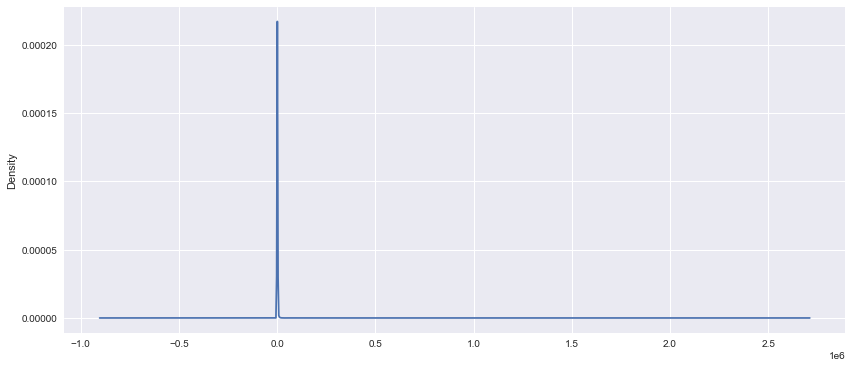

In [7]:
data['trip_duration'].plot(kind = 'density', figsize = (14,6))

<!-- # Indexing start_time
# data_i = data.set_index('start_time')

In [ ]:
ax = data['ride_id'].plot(kind = 'hist', figsize = (14,6))
ax.set_ylabel('Date')
ax.set_xlabel('Count')

In [ ]:
date = data['start_time']
casual = data['user_type'].str.contains('casual')
member = data['user_type'].str.contains('member')

plt.bar(date, data['ride_id'], color = '#f9b665', label = 'Casual')

plt.title('Trip Trend')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:>

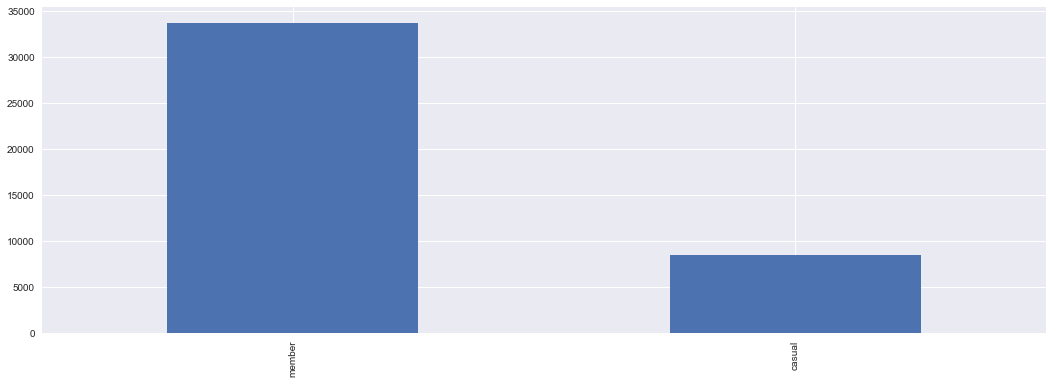

In [9]:
data['user_type'].value_counts().plot(kind = 'bar', figsize = (18,6))

In [10]:
data['user_type'].value_counts()

member    33793
casual     8508
Name: user_type, dtype: int64

<AxesSubplot:ylabel='user_type'>

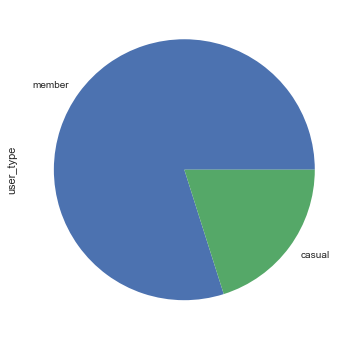

In [11]:
data['user_type'].value_counts().plot(kind = 'pie', figsize = (6, 6))


Text(0, 0.5, 'Trip Duration')

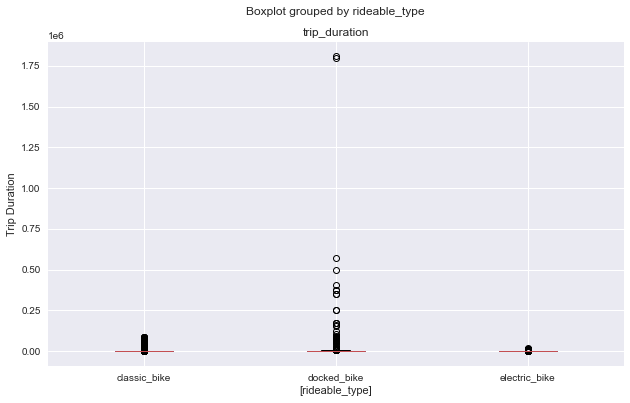

In [12]:
users = data['user_type'].value_counts()

ax = data[['trip_duration', 'rideable_type']].boxplot(by = 'rideable_type', figsize = (10,6))
ax.set_ylabel('Trip Duration')

In [ ]:
# verify the trip_duration column
from datetime import datetime

data['calculated_duration'] = data['end_time'] - data['start_time']
total_seconds(data['calculated_duration'])

In [14]:
print(pd.Series({"Memory usage": "{:.4f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())

Memory usage       4.9216 MB
Dataset shape    (42301, 14)


In [15]:
data.head()

,ride_id,rideable_type,bike_id,start_time,end_time,trip_duration,start_station_id,start_station_name,end_station_id,end_station_name,user_type,gender,birth_year,calculated_duration
1,05A7BDE8A0D909FC,electric_bike,NaN,2021-02-01 01:07:04,2021-02-01 01:47:45,2441,498,California Ave & Fletcher St,455,Maplewood Ave & Peterson Ave,casual,NaN,NaN,0 days 00:40:41
3,B12AD1843BE99A2C,classic_bike,NaN,2021-02-01 01:56:22,2021-02-01 01:59:23,181,192,Canal St & Adams St,107,Desplaines St & Jackson Blvd,member,NaN,NaN,0 days 00:03:01
4,A62978A16B1FFE79,classic_bike,NaN,2021-02-01 01:59:41,2021-02-01 02:21:23,1302,638,Clinton St & Jackson Blvd,172,Rush St & Cedar St,member,NaN,NaN,0 days 00:21:42
5,191F68D78FC5E76B,electric_bike,NaN,2021-02-01 03:03:30,2021-02-01 03:10:34,424,349,Halsted St & Wrightwood Ave,304,Broadway & Waveland Ave,casual,NaN,NaN,0 days 00:07:04
7,6D4D1A96830EBD3C,classic_bike,NaN,2021-02-01 04:40:26,2021-02-01 04:59:51,1165,622,California Ave & Cortez St,622,California Ave & Cortez St,casual,NaN,NaN,0 days 00:19:25


In [16]:
ewan = data['calculated_duration']

In [ ]:
timedelta = pd.Timedelta(ewan)
print('Timedelta...\n', timedelta)

In [23]:
data['try'] = data[:5]['calculated_duration'].astype('timedelta64[s]')
data.tail()

,ride_id,rideable_type,bike_id,start_time,end_time,trip_duration,start_station_id,start_station_name,end_station_id,end_station_name,user_type,gender,birth_year,calculated_duration,try,ok
48644,99912036858870CB,classic_bike,NaN,2021-02-28 23:51:03,2021-03-01 00:00:49,586,199,Wabash Ave & Grand Ave,301,Clark St & Schiller St,member,NaN,NaN,0 days 00:09:46,NaN,<NA>
48645,6654B62D78F8D0E9,classic_bike,NaN,2021-02-28 23:51:17,2021-02-28 23:57:24,367,205,Paulina St & 18th St,14,Morgan St & 18th St,member,NaN,NaN,0 days 00:06:07,NaN,<NA>
48646,083DA83D7FD023E1,classic_bike,NaN,2021-02-28 23:52:39,2021-03-01 00:06:29,830,71,Morgan St & Lake St,128,Damen Ave & Chicago Ave,casual,NaN,NaN,0 days 00:13:50,NaN,<NA>
48647,F893BC865791E925,classic_bike,NaN,2021-02-28 23:57:09,2021-03-01 00:22:03,1494,347,Ashland Ave & Grace St,632,Clark St & Newport St,member,NaN,NaN,0 days 00:24:54,NaN,<NA>
48648,C4FB97B61CEC3DF8,classic_bike,NaN,2021-02-28 23:59:41,2021-03-01 00:07:27,466,426,Ellis Ave & 60th St,322,Kimbark Ave & 53rd St,member,NaN,NaN,0 days 00:07:46,NaN,<NA>


In [19]:
data['try'].astype(pd.Int64Dtype())

1        2441
3         181
4        1302
5         424
7        1165
         ... 
48644    <NA>
48645    <NA>
48646    <NA>
48647    <NA>
48648    <NA>
Name: try, Length: 42301, dtype: Int64

In [20]:
data['ok'] = data['try'].astype(pd.Int64Dtype())

In [21]:
data.head()

,ride_id,rideable_type,bike_id,start_time,end_time,trip_duration,start_station_id,start_station_name,end_station_id,end_station_name,user_type,gender,birth_year,calculated_duration,try,ok
1,05A7BDE8A0D909FC,electric_bike,NaN,2021-02-01 01:07:04,2021-02-01 01:47:45,2441,498,California Ave & Fletcher St,455,Maplewood Ave & Peterson Ave,casual,NaN,NaN,0 days 00:40:41,2441.0,2441
3,B12AD1843BE99A2C,classic_bike,NaN,2021-02-01 01:56:22,2021-02-01 01:59:23,181,192,Canal St & Adams St,107,Desplaines St & Jackson Blvd,member,NaN,NaN,0 days 00:03:01,181.0,181
4,A62978A16B1FFE79,classic_bike,NaN,2021-02-01 01:59:41,2021-02-01 02:21:23,1302,638,Clinton St & Jackson Blvd,172,Rush St & Cedar St,member,NaN,NaN,0 days 00:21:42,1302.0,1302
5,191F68D78FC5E76B,electric_bike,NaN,2021-02-01 03:03:30,2021-02-01 03:10:34,424,349,Halsted St & Wrightwood Ave,304,Broadway & Waveland Ave,casual,NaN,NaN,0 days 00:07:04,424.0,424
7,6D4D1A96830EBD3C,classic_bike,NaN,2021-02-01 04:40:26,2021-02-01 04:59:51,1165,622,California Ave & Cortez St,622,California Ave & Cortez St,casual,NaN,NaN,0 days 00:19:25,1165.0,1165


In [ ]:
data['calculated_duration'].head()

In [ ]:
data['try'].astype(int)
data.head()

In [ ]:
data[:5]['calculated_duration'].astype(int)

In [ ]:
print(data['calculated_duration'].isnull().sum())

In [ ]:
data['try'] == pd.NaN

## Summary